# **Decision Trees**

```scikit-learn``` webpage [here](https://scikit-learn.org/stable/index.html) \
```DecisionTreeClassifier``` module [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

### In Synthetic data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

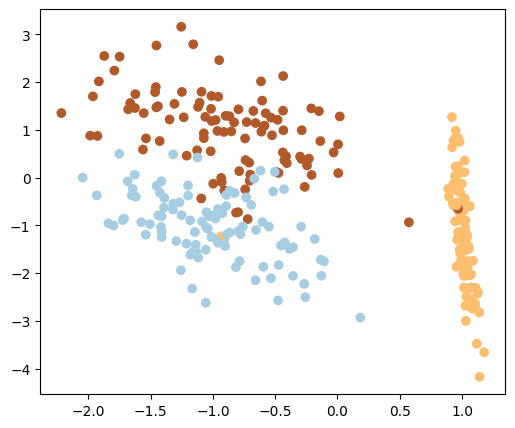

In [3]:
X, y = make_classification(n_samples = 300, n_features = 2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=3, random_state=5)

_, ax = plt.subplots(figsize=(6,5))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='Paired')

In [4]:
# Instancia de la regresion logistica
decision_tree = DecisionTreeClassifier()

# Entrenar el modelo de regresion logistica
decision_tree.fit ( X , y ) #(#muestras, #caracteristicas)

DecisionTreeClassifier()

In [5]:
predictions = decision_tree.predict ( X ) #(#muestras, #caracteristicas)

### **Decision boundaries**

In [8]:
# Valores minimos y maximos para crear el grid de las fronteras de decision
h_min, h_max = X[:, 0].min(), X[:, 0].max()
v_min, v_max = X[:, 1].min(), X[:, 1].max()

# Crear el grid de las fronteras de decision
h_grid, v_grid = np.meshgrid(np.linspace(h_min, h_max, 100), np.linspace(v_min, v_max, 100))

# Predecir los valores del grid
predictions = decision_tree.predict(np.c_[h_grid.ravel(), v_grid.ravel()])
print (predictions.shape)

# Encajar las predicciones al tamaño del grid
predictions = predictions.reshape(h_grid.shape)

(10000,)


[]

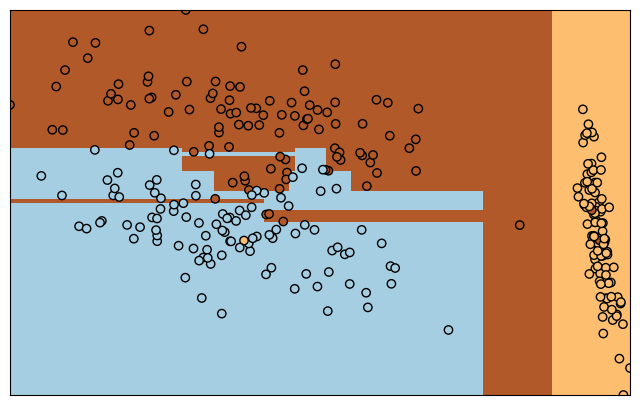

In [9]:
# Dibujar el grid y las fronteras de decision
_, ax = plt.subplots (figsize=(8,5))
ax.pcolormesh(h_grid, v_grid, predictions, cmap = plt.cm.Paired)

# Imprimir las muestras con el scatter
ax.scatter ( X[:, 0] , X[:, 1] ,  c = y , edgecolors='k', cmap=plt.cm.Paired)

ax.set_xlim(h_grid.min(), h_grid.max())
ax.set_ylim(v_grid.min(), v_grid.max())

ax.set_xticks(())
ax.set_yticks(())

### In Real data

```Iris``` dataset description [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)

In [10]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree # Regresion logistica
from sklearn.datasets import load_iris # Iris dataset 

In [11]:
iris = load_iris() # Cargar la base de datos iris
iris_x = iris.data[:, :] # Caracteristicas. Seleccionamos 2
iris_y = iris.target # Etiquetas

# Imprimir formas
print (iris_x.shape, iris_y.shape)

(150, 4) (150,)


In [12]:
# Instancia de la regresion logistica
decision_tree = DecisionTreeClassifier()

# Entrenar el modelo de regresion logistica
decision_tree.fit ( iris_x , iris_y ) #(#muestras, #caracteristicas)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 

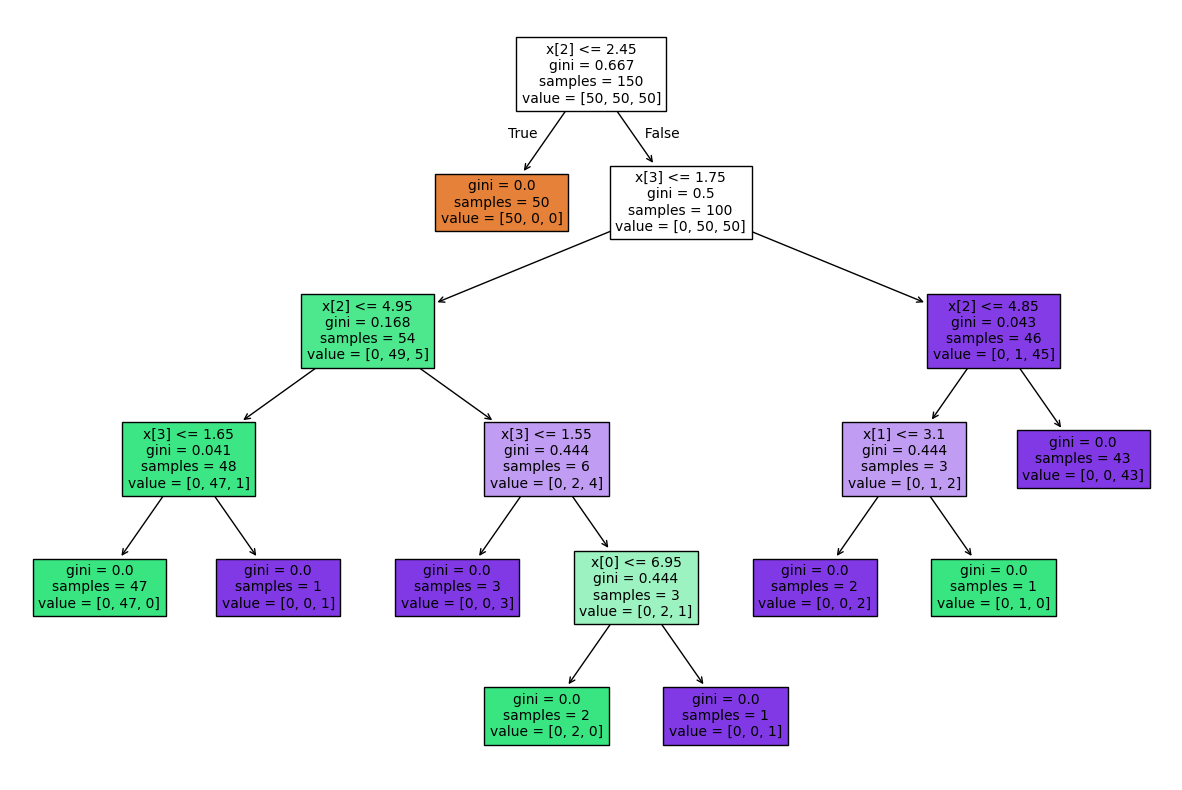

In [18]:
_, ax = plt.subplots(figsize=(15,10))
plot_tree(decision_tree, filled=True, fontsize=10, ax=ax)